## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################

For the i-th sample and k-th class's weight:

$f_{m}=(Wx_{i}+b)_{m}$

$Loss_{i}=max_{k}(f_{k})-f_{y_i}$                              

$\frac{\partial L_{i}}{\partial f_{m}}=\frac{\partial max_{k}(f_k) - f_{y_i}}{\partial f_m}=\frac{\partial max_{k}(f_k)}{\partial f_m}-\frac{\partial f_{y_i}}{\partial f_m}$        
It has 4 cases:
- when $m==y_i$ and it m is max, it is 0;
- $m == y_i$ and it m is not max, it it -1;
- $m != y_i$ and it m is max, it it 1;
- $m != y_i$ and it m is not max, it it 0;

$\frac{\partial f_{m}}{\partial W_{k}} = x_{i}$

$\frac{\partial f_{m}}{\partial b{k}} = 1$

$\frac{\partial L_{i}}{\partial W_{k}} = \frac{\partial L_{i}}{\partial f_{m}} \times \frac{\partial f_{m}}{\partial W_{k}} =   x_{i} \text{ or } -x_{i} \text{ or } 0$ 

When $W_k$ classify correctly, the gredient of $W_k$ is 0; Otherwise, the gradient is $-x_{i}$ for $W_{y_i}$ and $x_{i}$ for $W_{k}$;

$\frac{\partial L_{i}}{\partial b_{k}} = \frac{\partial L_{i}}{\partial f_{m}} \times \frac{\partial f_{m}}{\partial b_{k}} =   1 \text{ or } -1 \text{ or } 0$ 

When $b_k$ classify correctly, the gredient of $b_k$ is 0; Otherwise, the gradient is $-1$ for $b_{y_i}$ and $1$ for $b_{k}$;

In [205]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [206]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [207]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  X_test.shape)


X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (45, 4)


In [208]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        w = 0.001*np.random.randn(weight_dimension,num_cls)
        b = 0.001*np.random.randn(1, num_cls)
        weight = np.concatenate( (w,b), axis = 0)

        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        #norm_data /= np.sum(norm_data, axis=1).reshape(-1,1)
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = None
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################

        def score(x, w):
            return np.dot(x, w)
        
        # s = score(X_train, self.weight)
        # y = np.max(s,axis = 1).reshape(-1,1)    

        # b = s[np.arange(np.size(y_train)), y_train.astype(int).flatten()].reshape(-1,1)    

        # loss = np.sum(y - b)
        # loss = loss + 1e-5*np.linalg.norm(self.weight[:,:-1],'fro')**2
        # loss /=float(np.size(y))
        # forward to output
        s = np.dot(X_train, self.weight)
        y = np.max(s,axis = 1).reshape(-1,1)   
        b = s[np.arange(np.size(y_train)), y_train.astype(int).flatten() ]

        # loss
        loss = np.sum(y - b)
        reg = 1e-3
        loss += 0.5 * reg * np.sum(self.weight * self.weight)
        loss /= X_train.shape[0]
        
        # gredient and update
        y_pred = np.argmax(s, axis=1)

        ds = np.zeros_like(s)

        # fyi not max,  1
        ds[np.arange(np.size(y_train))[y_pred != y_train], y_train[y_pred != y_train]] = -1

        # fm not fyi, is max,  -1
        ds[np.arange(np.size(y_train))[y_pred != y_train], y_pred[y_pred != y_train]] = 1

        dW = X_train[:, :-1].T.dot(ds)
        #ds[np.arange(np.size(y_train)), y_train.astype(int).flatten()] -= 1*2
        #dW = X_train[:,:-1].T.dot(ds)
        #db = np.array( [np.sum(s, axis=0)]) 
        db = np.array( [np.sum(ds, axis = 0)]) 

        dW = np.concatenate((dW,db), axis=0)

        dW /=  X_train.shape[0] 
        dW += reg * self.weight
        self.weight -= self.lr * dW

        # acc
        s = np.dot(X_train, self.weight)
        y_pred = np.argmax(s, axis=1)
        train_acc = (y_pred == y_train).mean()
        return train_acc
        
    def test_step(self, X_test, y_test):
        
        
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = None
        X_test = np.column_stack( (X_test, [1]*num_sample))
        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        s = np.dot(X_test, self.weight)

        # save acc
        y_pred = np.argmax(s, axis=1)
        test_acc = (y_pred == y_test).mean()
           
        return test_acc
        
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
        self.X_train = np.column_stack( (self.X_train, [1]*num_sample))
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.657 tst_acc:0.600
epoch: 1 traing_acc:0.686 tst_acc:0.622
epoch: 2 traing_acc:0.790 tst_acc:0.800
epoch: 3 traing_acc:0.867 tst_acc:0.844
epoch: 4 traing_acc:0.895 tst_acc:0.867
epoch: 5 traing_acc:0.905 tst_acc:0.889
epoch: 6 traing_acc:0.905 tst_acc:0.889
epoch: 7 traing_acc:0.914 tst_acc:0.889
epoch: 8 traing_acc:0.914 tst_acc:0.933
epoch: 9 traing_acc:0.914 tst_acc:0.933
epoch: 10 traing_acc:0.914 tst_acc:0.933
epoch: 11 traing_acc:0.924 tst_acc:0.956
epoch: 12 traing_acc:0.933 tst_acc:0.978
epoch: 13 traing_acc:0.933 tst_acc:0.956
epoch: 14 traing_acc:0.952 tst_acc:0.978
epoch: 15 traing_acc:0.943 tst_acc:0.978
epoch: 16 traing_acc:0.943 tst_acc:0.978
epoch: 17 traing_acc:0.952 tst_acc:0.978
epoch: 18 traing_acc:0.962 tst_acc:0.978
epoch: 19 traing_acc:0.952 tst_acc:0.978


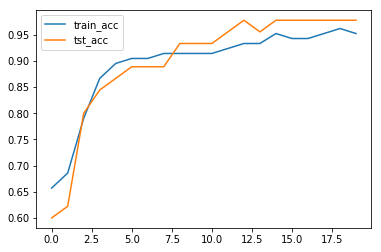

In [209]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

# X_train 4 features, 150 samples
# y_train 1 label,  3 classes
learn_rate = 0.001
epochs = 20
nclass = len(np.unique(y_train))

dweight = X_train.shape[1]

mcp = MultiClsPLA(X_train, y_train, X_test, y_test, learn_rate, epochs, dweight, nclass)
mcp.train()
mcp.vis_acc_curve()